In [572]:
import numpy as np
import pandas as pd

In [573]:
import os
import glob

In [574]:
from scipy.optimize import curve_fit

In [575]:
import matplotlib.pyplot as plt

In [576]:
#loading 6 peaks
folder_path = 'spectroscopy data\peaks_6'

csv_files = glob.glob(os.path.join(folder_path, '*.csv')) 

dataframes6peaks = []

In [577]:
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes6peaks.append(df)
    print(f"{i} Loaded {file}:")  # Display first few rows of each file


1 Loaded spectroscopy data\peaks_6\6_ (1).CSV:
2 Loaded spectroscopy data\peaks_6\6_ (10).CSV:
3 Loaded spectroscopy data\peaks_6\6_ (2).CSV:
4 Loaded spectroscopy data\peaks_6\6_ (3).CSV:
5 Loaded spectroscopy data\peaks_6\6_ (4).CSV:
6 Loaded spectroscopy data\peaks_6\6_ (5).CSV:
7 Loaded spectroscopy data\peaks_6\6_ (6).CSV:
8 Loaded spectroscopy data\peaks_6\6_ (7).CSV:
9 Loaded spectroscopy data\peaks_6\6_ (8).CSV:
10 Loaded spectroscopy data\peaks_6\6_ (9).CSV:
11 Loaded spectroscopy data\peaks_6\CS-BB-22.CSV:
12 Loaded spectroscopy data\peaks_6\CS-BB-23.CSV:


In [578]:
#loading 5 peaks
folder_path = 'spectroscopy data\peaks_5'
csv_files = glob.glob(os.path.join(folder_path, '*.csv')) 
dataframes5peaks = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes5peaks.append(df)
    print(f"{i} Loaded {file}:") 

1 Loaded spectroscopy data\peaks_5\5_ (1).CSV:
2 Loaded spectroscopy data\peaks_5\5_ (10).CSV:
3 Loaded spectroscopy data\peaks_5\5_ (11).CSV:
4 Loaded spectroscopy data\peaks_5\5_ (2).CSV:
5 Loaded spectroscopy data\peaks_5\5_ (3).CSV:
6 Loaded spectroscopy data\peaks_5\5_ (4).CSV:
7 Loaded spectroscopy data\peaks_5\5_ (5).CSV:
8 Loaded spectroscopy data\peaks_5\5_ (6).CSV:
9 Loaded spectroscopy data\peaks_5\5_ (7).CSV:
10 Loaded spectroscopy data\peaks_5\5_ (8).CSV:
11 Loaded spectroscopy data\peaks_5\5_ (9).CSV:


In [579]:
#loading dopplers
folder_path = 'spectroscopy data\doppler'
csv_files = glob.glob(os.path.join(folder_path, '*.csv')) 
dataframes_doppler = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes_doppler.append(df)
    print(f"{i} Loaded {file}:") 

1 Loaded spectroscopy data\doppler\doppler (1).CSV:
2 Loaded spectroscopy data\doppler\doppler (2).CSV:
3 Loaded spectroscopy data\doppler\doppler (3).CSV:
4 Loaded spectroscopy data\doppler\doppler (4).CSV:


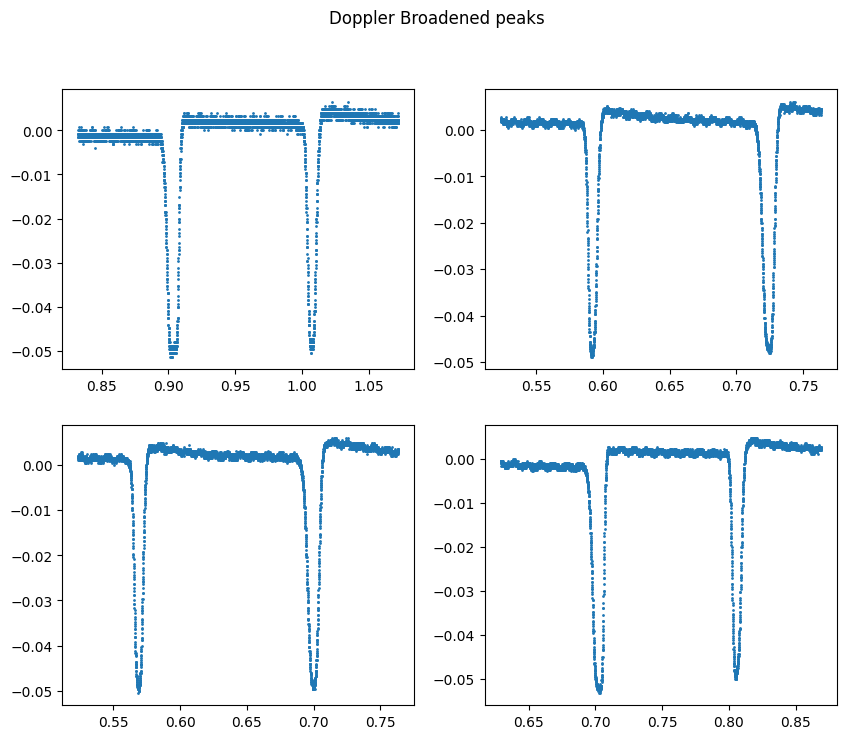

In [580]:
#fitting Doppler 
# problem - missing the CH2!! idk which dip is which..
fig, axs = plt.subplots(2,2 , figsize=(10, 8))

fig.suptitle('Doppler Broadened peaks')
for i in range(4):
    axs[i//2 , i%2].scatter(dataframes_doppler[i]['[s]'], dataframes_doppler[i]['CH1[V]'], s=1)

### gaussian fits on Doppler Broadened Peaks
Objective : Get the energy to time Conversion rate.
- fit each dip inside a measuremnt set with a gaussian
- for each set of 2 fits - get the distance
- compare the distance - get the erorrs

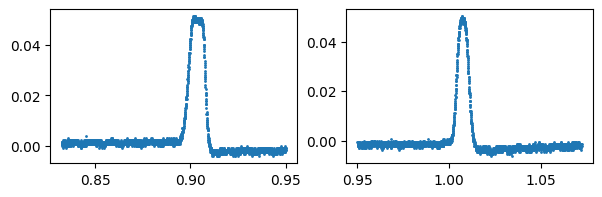

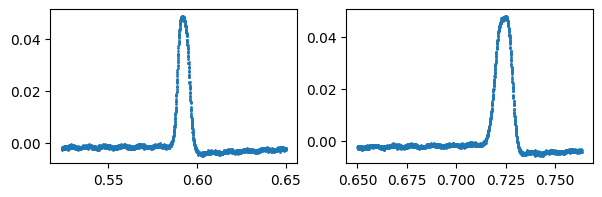

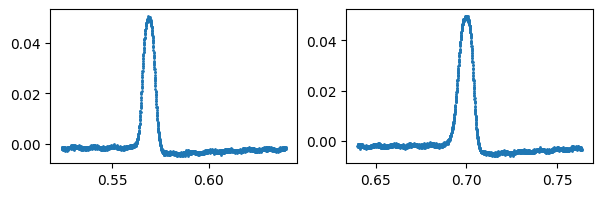

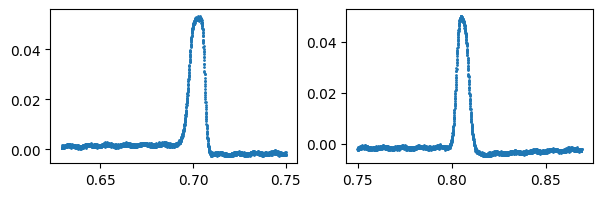

In [581]:
# df_doppler_edited = []
df_doppler_edited = np.ones((4,2), dtype=object)
cuts = [0.95, 0.65, 0.64, 0.75]

for i in range(4):
    df = dataframes_doppler[i]
    df['CH1[V]'] *= -1

    cut_index = (df['[s]'] - cuts[i]).abs().argmin()
    df1 = df.iloc[:cut_index]
    # df_doppler_edited.append(df1)
    df_doppler_edited[i, 0] = df1
    df2 = df.iloc[cut_index:]
    # df_doppler_edited.append(df2)
    df_doppler_edited[i, 1] = df2
    fig, axs = plt.subplots(1,2, figsize = (7,2))
    axs[0].scatter(df1['[s]'], df1['CH1[V]'], s=1)
    axs[ 1].scatter(df2['[s]'], df2['CH1[V]'], s=1)

# portioned dips / peaks saved in df_doppler_edited

In [582]:
#normalize
for i in range(8):
    df_doppler_edited[i//4, i%2].loc[:,'CH1[V]'] = df_doppler_edited[i//4, i%2]['CH1[V]'] / df_doppler_edited[i//4, i%2]['CH1[V]'].abs().max()

In [583]:
#peak guesses
p0_peaks = [0.902, 1.008, 0.593, 0.725, 0.57, 0.7, 0.702, 0.805]
p0_peaks = np.array(p0_peaks).reshape(4,2)

In [584]:
#cut an area around the peak

for i in range(4):
    for j in range(2):

        # df_rn  = df_doppler_edited[i, j]
        # print(df_doppler_edited[i, j].head())

        left = p0_peaks[i, j] - 0.015
        right = p0_peaks[i, j] + 0.015
        # print(left, right)

        new_cut1  = (df_doppler_edited[i,j]['[s]'] - left).abs().argmin()
        new_cut2  = (df_doppler_edited[i,j]['[s]'] - right).abs().argmin()
        df_doppler_edited[i,j] = df_doppler_edited[i,j].iloc[new_cut1:new_cut2]
        # print(len(df_doppler_edited[i,j]))

In [585]:
# fit function
def gauss(x, x0, sigma): 
    return np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)) 

C:\Users\alexr\AppData\Local\Temp\ipykernel_14496\721480606.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params[i,j], covs[i,j] = curve_fit(gauss, df_doppler_edited[i,j]['[s]'], df_doppler_edited[i,j]['CH1[V]'])


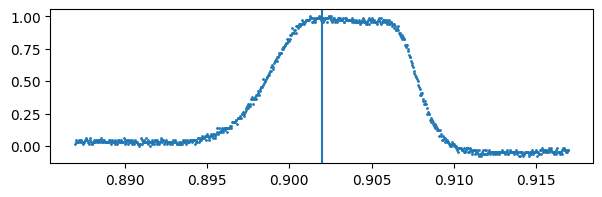

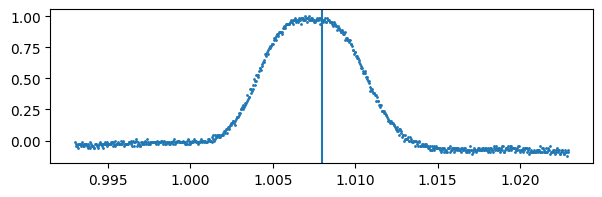

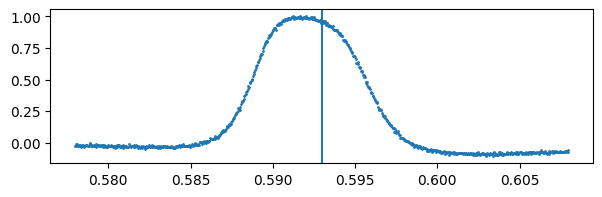

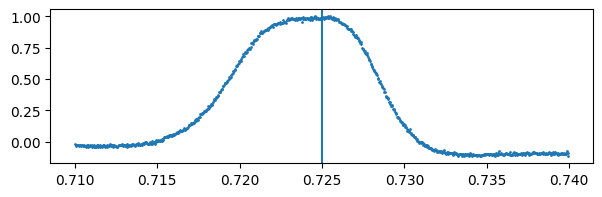

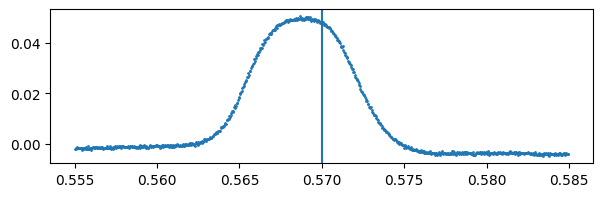

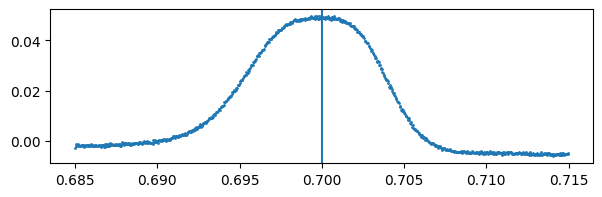

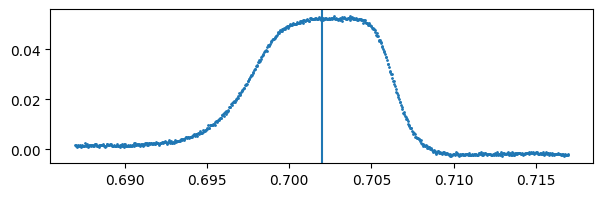

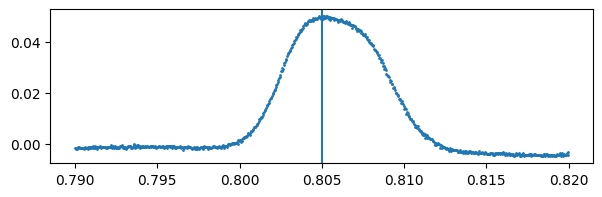

In [586]:
params  = np.zeros((4,2), dtype = object)
covs  = np.zeros((4,2), dtype = object)

for i in range(4):
    for j in range(2):
        p0 = [p0_peaks[i,j], 0.04]
        params[i,j], covs[i,j] = curve_fit(gauss, df_doppler_edited[i,j]['[s]'], df_doppler_edited[i,j]['CH1[V]'])
        # fit_y = gauss(df_doppler_edited[i,j]['[s]'], params[i,j][0], params[i,j][1]) 
        # print(params[i,j])
        #plot
        xdat  =df_doppler_edited[i,j]['[s]']
        ydat = df_doppler_edited[i,j]['CH1[V]']

        fig, ax = plt.subplots( figsize = (7,2))
        ax.scatter(xdat, ydat, s=1)
        ax.axvline(p0_peaks[i,j])
        # ax.plot(xdat, fit_y, color= 'red')

In [587]:
xlin = np.linspace(0.84, 1, 1000)
fit_y = gauss(xlin, params[0], params[1],params[2],params[3]) 
plt.scatter(xlin, fit_y)

TypeError: gauss() takes 3 positional arguments but 5 were given

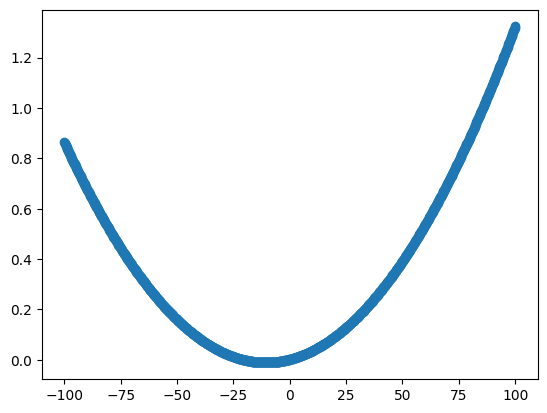

In [179]:
xlin = np.linspace(-100, 100, 1000)
fit_y = gauss(xlin, params[0], params[1],params[2],params[3]) 
plt.scatter(xlin, fit_y)